In [6]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from pytorch_lightning import Trainer

from libs.seq2seq_model import RNNModel
from libs.lfgenerator import Shift

In [7]:
model = RNNModel.load_from_checkpoint("./runs/tanhRNN/version_7/checkpoints/tanhRNN-epoch=155-valid_loss=9.75e-02.ckpt")
model = RNNModel.load_from_checkpoint("./runs/tanhRNN_3w/version_0/checkpoints/tanhRNN_3w-epoch=102-valid_loss=7.11e-02.ckpt")

## Memory evaluation

$$x = [1, 0, \dots, 0] \in \mathbb{R}^T$$
$$Memory_t = Model(x)_t$$

In [8]:
id = torch.zeros(1,200,3)
id[0,0,0] = 1.0

Text(0.5, 1.0, '3W Decay is faster than exponential')

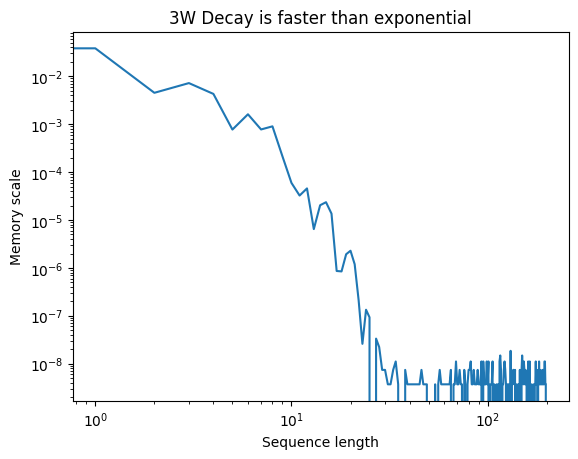

In [9]:
model.return_sequence = True
output = model(id)[0,:].detach().cpu().numpy()
output -= output[-1]
output = np.abs(output)
plt.plot(output)
plt.xlabel("Sequence length")
plt.ylabel("Memory scale")
plt.yscale("log")
plt.xscale("log")

plt.title("3W Decay is faster than exponential")

Text(0.5, 1.0, 'Decay is faster than exponential')

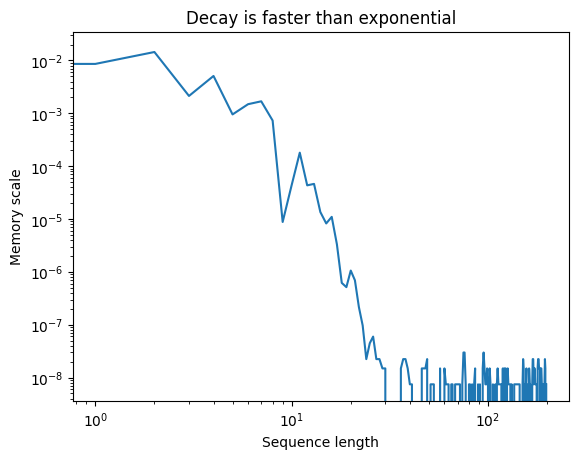

In [10]:
id = torch.ones(1,200,3)

output = model(id)[0,:].detach().cpu().numpy()
memory = output[1:] - output[:-1]
memory = np.abs(memory)
plt.plot(memory)
plt.xlabel("Sequence length")
plt.ylabel("Memory scale")
plt.yscale("log")
plt.xscale("log")

plt.title("Decay is faster than exponential")